# TRAITEMENT DES VALEURS ABERRANTES

In [1]:
# Importation des librairies
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importation des données depuis mon GitHub
url = "https://raw.githubusercontent.com/simaleo/data_book1/main/hdv2003.csv"
data = pd.read_csv(url)

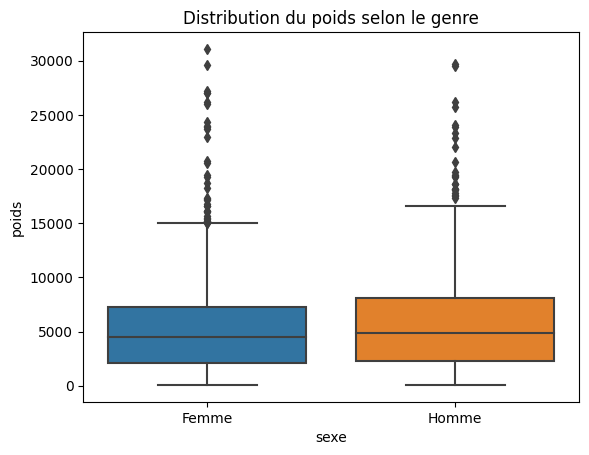

In [3]:
# Boîtes à moustache de poids par genre
sns.boxplot(x = 'sexe', y = 'poids', data = data)
plt.title("Distribution du poids selon le genre")
plt.show()

In [4]:
# Fonction pour identifier les valeurs aberrantes
def outliers(data, var_name):
    iqr = stat.iqr(data[var_name])
    lower = np.quantile(data[var_name], 0.25) - 1.5 * iqr
    upper = np.quantile(data[var_name], 0.75) + 1.5 * iqr
    return data[(data[var_name] < lower) | (data[var_name] > upper)]

In [5]:
# Utilisation de la fonction outliers crée
outlier = outliers(data, 'poids')

In [6]:
outlier.head()

,id,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
19,20,39,Femme,Enseignement technique ou professionnel court,27195.837824,Exerce une profession,Ouvrier qualifie,5,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Non,Non,Oui,Oui,2.7
59,60,57,Femme,Enseignement superieur y compris technique sup...,23732.485295,Exerce une profession,NaN,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0
68,69,44,Femme,1er cycle,20604.264200,Exerce une profession,Employe,8,Non,Ni croyance ni appartenance,Moins important que le reste,Equilibre,Non,Non,Oui,Non,Oui,Oui,Oui,0.4
77,78,75,Femme,Derniere annee d'etudes primaires,17333.254401,Retire des affaires,NaN,2,Non,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,1.0
100,101,61,Femme,Enseignement technique ou professionnel court,22962.359595,Retraite,Cadre,1,Non,Appartenance sans pratique,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,4.0


In [7]:
# Fonction pour supprimer les outliers
def outliers_set(data, var1, var2):
    
#     Création d'une liste pour les différentes modalités de la variable qualitative
    lt = data[var1].dropna().unique()
    
    df = pd.DataFrame()
    
    for x in lt:
        dt = data[data[var1] == x]
        
#         Calcul de IQR
        iqr = stat.iqr(dt[var2])
    
#         Calcul des outliers
        lower = np.quantile(dt[var2], 0.25) - 1.5 * iqr
        upper = np.quantile(dt[var2], 0.75) + 1.5 * iqr
        
#         Remplacement des outliers dans les données
        dt.loc[dt[var2] > upper, var2] = upper
        dt.loc[dt[var2] < lower, var2] = lower
        
#         Données sans outliers
        df = pd.concat([df, dt])
        
    return df      

In [8]:
# Utilisation de la fonction outliers_set crée
sd = outliers_set(data, 'sexe', 'poids')

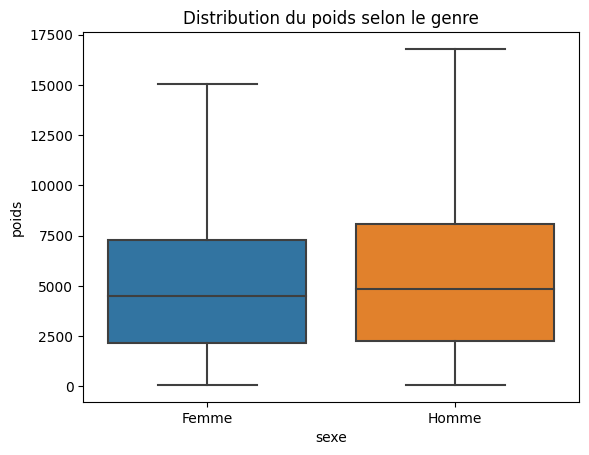

In [9]:
# Boîtes à moustaches de poids par sexe après suppression des valeurs aberrantes
sns.boxplot(x = 'sexe', y = 'poids', data = sd)
plt.title("Distribution du poids selon le genre")
plt.show()

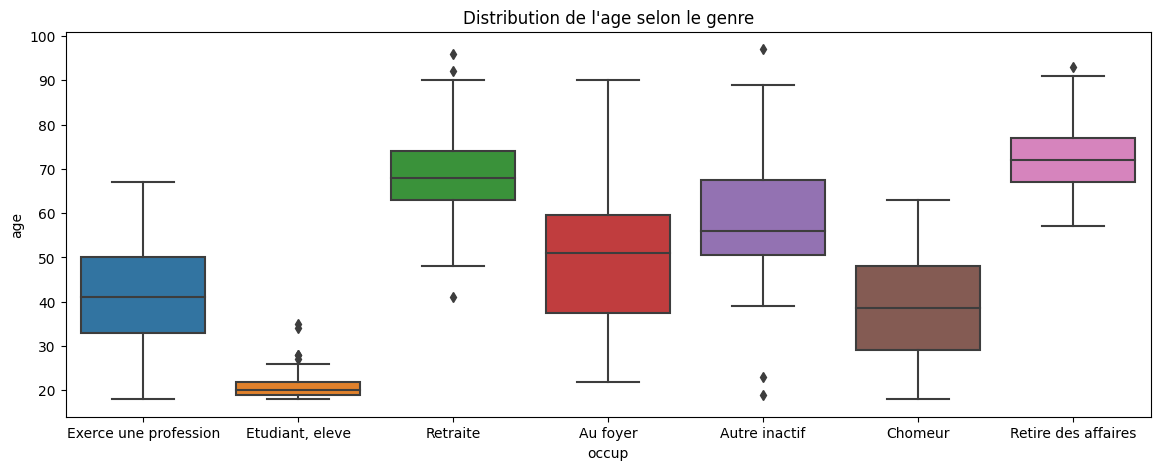

In [10]:
# Boîtes à moustache de l'age par genre
plt.subplots(figsize = (14, 5))
sns.boxplot(x = 'occup', y = 'age', data = data)
plt.title("Distribution de l'age selon le genre")
plt.show()

In [11]:
# Utilisation de la fonction outlier_set pour supprimer les valeurs manquantes
dp = outliers_set(data, 'occup', 'age')

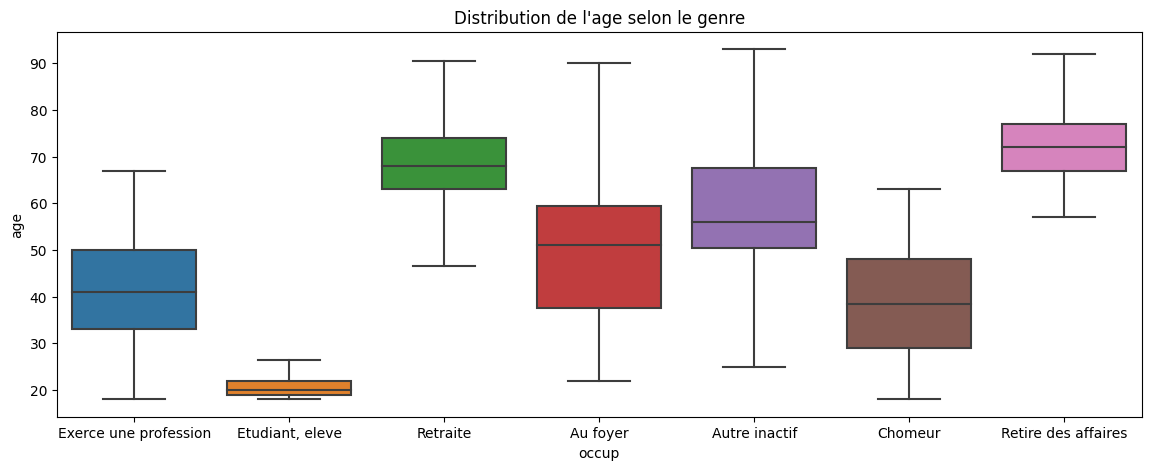

In [12]:
# Boîtes à moustache de l'age par genre
plt.subplots(figsize = (14, 5))
sns.boxplot(x = 'occup', y = 'age', data = dp)
plt.title("Distribution de l'age selon le genre")
plt.show()